# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('beverage_sales_cluster.csv')

In [3]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
 11  Cluster        10000 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


In [4]:
df_copy = df.copy()

In [5]:
df_copy.drop(columns=['Order_ID','Customer_ID','Customer_Type', 'Product','Order_Date'], inplace=True)

In [6]:
print(df_copy.head())
print(df_copy.nunique())

              Category  Unit_Price  Quantity  Discount  Total_Price  \
0               Juices        1.87        74      0.10       124.54   
1          Soft Drinks        1.87        18      0.05        31.98   
2  Alcoholic Beverages       12.04        71      0.15       726.61   
3  Alcoholic Beverages       64.91        91      0.10      5316.13   
4               Juices        1.64         4      0.00         6.56   

          Region  Cluster  
0  Niedersachsen        0  
1         Bremen        1  
2      Thüringen        2  
3        Hamburg        2  
4        Sachsen        1  
Category          4
Unit_Price      928
Quantity        100
Discount          4
Total_Price    4269
Region           16
Cluster           3
dtype: int64


In [7]:
# 1. Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode kolom 'smoking_status', 'income_level', dan 'gender'
df_copy['Category'] = label_encoder.fit_transform(df_copy['Category'])
df_copy['Region'] = label_encoder.fit_transform(df_copy['Region'])

# 2. Scaling untuk kolom 'age' menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom numerik ke range [0, 1]
df_copy['Discount'] = scaler.fit_transform(df_copy[['Discount']])
df_copy['Unit_Price'] = scaler.fit_transform(df_copy[['Unit_Price']])
df_copy['Quantity'] = scaler.fit_transform(df_copy[['Quantity']])
df_copy['Total_Price'] = scaler.fit_transform(df_copy[['Total_Price']])

# Tampilkan hasil preprocessing
print(df_copy.head())


   Category  Unit_Price  Quantity  Discount  Total_Price  Region  Cluster
0         1    0.011128  0.737374  0.666667     0.012282       8        0
1         2    0.011128  0.171717  0.333333     0.003128       4        1
2         0    0.084616  0.707071  1.000000     0.071824      15        2
3         0    0.466652  0.909091  0.666667     0.525711       5        2
4         1    0.009466  0.030303  0.000000     0.000614      12        1


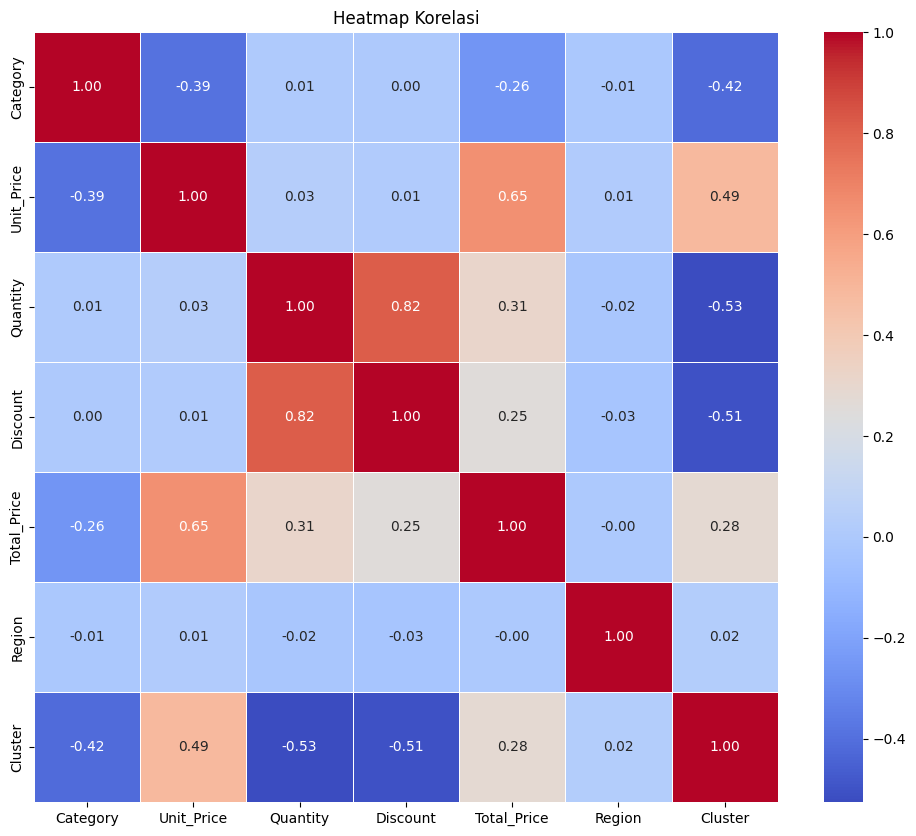

In [8]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [9]:
# Pisahkan fitur (X) dan target (y)
X = df_copy.drop(columns=['Cluster'])
y = df_copy['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 6), y_train=(8000,)
Test set shape: X_test=(2000, 6), y_test=(2000,)


In [10]:
# Pastikan kolom 'cluster' tidak termasuk dalam fitur X
print("Fitur yang digunakan:", X.columns)

Fitur yang digunakan: Index(['Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price',
       'Region'],
      dtype='object')


In [12]:
# Cek distribusi kelas target
print(df_copy['Cluster'].value_counts())

Cluster
1    6376
0    2152
2    1472
Name: count, dtype: int64


In [13]:
# Cek proporsi data training dan testing
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (8000, 6), Testing data shape: (2000, 6)


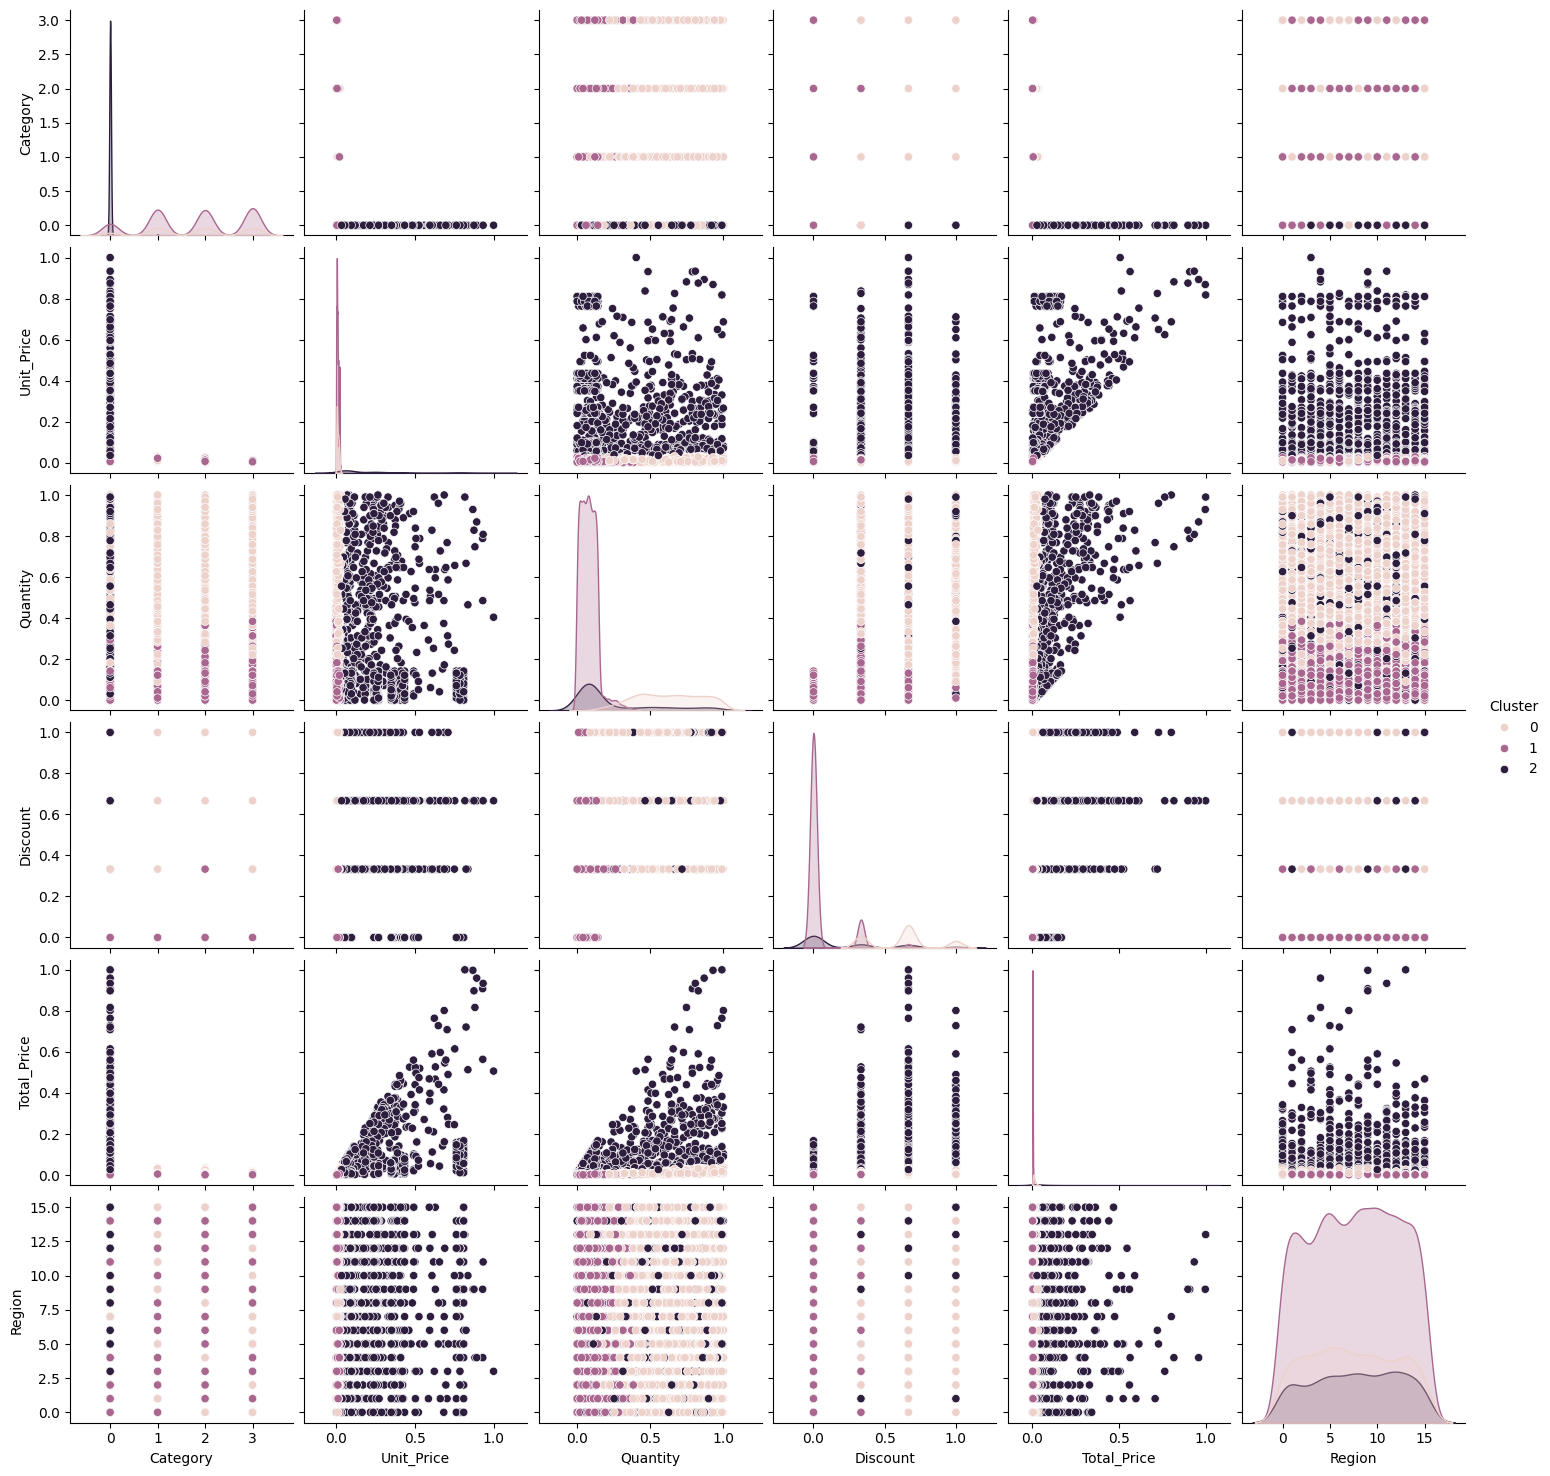

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi fitur berdasarkan cluster
sns.pairplot(df_copy, hue='Cluster')
plt.show()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [15]:
# Model 1: SVM
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# model 3 : KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# from sklearn.metrics import accuracy_score

# Akurasi Training SVM
svm_train_pred = svm.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
print(f"Akurasi Training SVM: {svm_train_acc:.4f}")

# Akurasi Training Random Forest
rf_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Akurasi Training Random Forest: {rf_train_acc:.4f}")

# Akurasi Training KNN
knn_train_pred = knn.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Akurasi Training KNN: {knn_train_acc:.4f}")


Akurasi Training SVM: 0.9634
Akurasi Training Random Forest: 1.0000
Akurasi Training KNN: 0.9732


In [17]:
# Pengecekan akurasi dengan cross validation

# Evaluasi svm dengan cross-validation
cv_scores_logreg = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (svm): {cv_scores_logreg.mean():.4f}")

# Evaluasi Random Forest dengan cross-validation
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

# Evaluasi KNN dengan cross-validation
cv_scores_rf = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (KNN): {cv_scores_rf.mean():.4f}")

Cross-validation accuracy (svm): 0.9618
Cross-validation accuracy (Random Forest): 0.9958
Cross-validation accuracy (KNN): 0.9524


Saya mencoba menggunakan beberapa algoritma yaitu svm, knn, dan random forest. Hasil menunjukkan bahwa pada akurasi data training pada algoritma random forest terjadi overfitting. Oleh karena itu saya mengecek juga dengan cross validation score.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [18]:
# Prediksi menggunakan kedua model
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluasi Logistic Regression
print("svm Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Evaluasi Random Forest Classifier
print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluasi knn
print("\nknn Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

svm Regression Results:
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       434
           1       0.96      1.00      0.98      1285
           2       0.99      0.79      0.88       281

    accuracy                           0.96      2000
   macro avg       0.97      0.92      0.94      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
[[ 426    6    2]
 [   6 1279    0]
 [  11   49  221]]

Random Forest Classifier Results:
Accuracy: 0.9975
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       434
           1       1.00      1.00      1.00      1285
           2       1.00      0.99      0.99       281

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[ 434  

Dari uji yang telah dilaksanakan, didapatkan bahwa model terbaik adalah model random forest karena mencapai 99% accuracy

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Hyperparameter space untuk KNN
param_dist_knn = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 100),
    'p': [1, 2]
}

# Randomized Search untuk KNN
random_search_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Training
random_search_knn.fit(X_train, y_train)

# Output hasil tuning
print("Best hyperparameters for KNN:", random_search_knn.best_params_)
print("Best score for KNN:", random_search_knn.best_score_)





Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 54, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best score for KNN: 0.9662499999999999


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [20]:
# Evaluasi pada test set KNN
best_knn_model = random_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)
print(f"Accuracy of best KNN model on test set: {accuracy_score(y_test, y_pred_best_knn):.4f}")

# Evaluasi knn
print("\nknn Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_knn))


Accuracy of best KNN model on test set: 0.9635

knn Classifier Results:
Accuracy: 0.9635
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       434
           1       0.98      0.98      0.98      1285
           2       0.95      0.91      0.93       281

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
[[ 412   16    6]
 [  19 1258    8]
 [  11   13  257]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Saya di sini menggunakan 3 algoritma klasifikasi yaitu knn,svm, dan randomforest. Pada praktiknya ketiga algoritma bekerja dengan baik. Ketiganya menghasilkan accuracy di atas 90% baik di training maupun di testing.

2. Saya melakukan eksplorasi hyperparameter tuning kepada dua algoritma yaitu knn dan random forest. Ditemukan hasil bahwa knn berhasil memperbaiki accuracy nya dari 0.95 menjadi 0.96, peningkatan yang bisa dibilang cukup.

3. Analisis Per Cluster
Mari kita lihat performa model KNN untuk setiap cluster berdasarkan classification report:
  - Cluster 0
    - Precision: 0.93
    - Recall: 0.95
    - F1-Score: 0.94
    - Support: 434 sampel
    - Analisis: Model menunjukkan performa yang sangat baik dalam mengidentifikasi data dari Cluster 0. Recall yang tinggi menandakan bahwa sebagian besar data dari cluster ini berhasil dikenali, sementara precision yang sedikit lebih rendah menunjukkan masih ada sedikit kesalahan prediksi positif.
    - Kesimpulan: Performa sangat baik, meskipun masih ada ruang kecil untuk meningkatkan precision.

  - Cluster 1
    - Precision: 0.98
    - Recall: 0.98
    - F1-Score: 0.98
    - Support: 1285 sampel
    - Analisis: Model bekerja hampir sempurna pada Cluster 1. Precision dan recall yang seimbang dan sangat tinggi menunjukkan bahwa model sangat akurat dan sensitif terhadap data dalam cluster ini.
    - Kesimpulan: Performa model untuk cluster ini optimal.

  - Cluster 2
    - Precision: 0.95
    - Recall: 0.91
    - F1-Score: 0.93
    - Support: 281 sampel
    - Analisis: Model cukup baik dalam mendeteksi data dari Cluster 2, dengan precision tinggi namun recall sedikit lebih rendah. Ini menunjukkan adanya beberapa data dari cluster ini yang terlewat (false negatives).
    - Kesimpulan: Performa sangat baik, tetapi recall dapat ditingkatkan untuk mengurangi jumlah data yang tidak terdeteksi dari cluster ini.

4. Observasi Umum
  - Cluster Dominan (Cluster 1):
  Cluster 1 merupakan cluster dengan jumlah data terbanyak (1.285 dari 2.000). Model menunjukkan performa optimal di cluster ini, yang sangat mendukung akurasi keseluruhan.
  - Cluster Minoritas (Cluster 0 & 2):
  Meskipun jumlah data lebih sedikit dibandingkan Cluster 1, model tetap menunjukkan performa yang sangat baik. Namun, precision pada Cluster 0 dan recall pada Cluster 2 menjadi area yang masih dapat ditingkatkan.
  - Keseimbangan Performa:
  F1-score untuk semua cluster berada di atas 0.93, yang menunjukkan keseimbangan yang sangat baik antara precision dan recall di seluruh kelas.
  - Akurasi keseluruhan model: 96.35%, dengan nilai rata-rata tertimbang (weighted average) F1-score juga sebesar 0.96 — indikasi bahwa model bekerja secara konsisten di semua kelas.

5. Saran Perbaikan
  - Feature Engineering Tambahan
  Menambahkan fitur relevan yang dapat membantu membedakan cluster minoritas seperti Cluster 2, misalnya fitur waktu transaksi, jenis pelanggan, atau atribut demografis jika tersedia.
  - Hyperparameter Tuning Lanjutan
  Melakukan penyesuaian parameter k, serta eksplorasi metrik jarak dan bobot (misalnya distance-based weighting) untuk mengurangi kesalahan klasifikasi minor.

6. Kesimpulan
  - Model KNN berhasil mencapai akurasi tinggi sebesar 96.35% dengan performa yang seimbang di semua cluster.
  - Cluster 1 (dominasi data) memiliki performa terbaik dan sangat konsisten.
  - Cluster 0 dan Cluster 2 juga menunjukkan performa sangat baik, meskipun precision dan recall masih dapat ditingkatkan.
  - Model ini sudah layak digunakan untuk klasifikasi, namun dengan sedikit perbaikan khususnya pada minor cluster, akurasi dan keandalannya dapat lebih ditingkatkan lagi.